### Analysis of chinese food data 


In [1]:
import matplotlib.pyplot as plt
import seaborn as sns
import numpy as np
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler
from sklearn.linear_model import LinearRegression
from sklearn.metrics import mean_squared_error, r2_score
import pandas as pd


# Pfad zur Excel-Datei
file_path = 'chinese_food.xlsx'

# Excel-Datei in einen DataFrame laden
df = pd.read_excel(file_path)

# Den DataFrame anzeigen
display(df.head())

,Foodcode of Chinese Food Composition Table,Food item,Food sub-group,Food group,GHGE of 1 kg food as consumed\n(kg CO2-eq/kg),Data source,Language of journal
0,11101,Wheat,wheat,Cereals,0.296835,"Zhang D, Shen J, Zhang F, et al. Carbon footpr...",English
1,11101,Wheat,wheat,Cereals,0.301455,"Zhang G, Wang X, Zhang L, et al. Carbon and wa...",English
2,11101,Wheat,wheat,Cereals,0.331485,"卫凯平,武慧君,黄莉,王晓旭,陈晓芳.农业生产系统氮磷环境影响分析以安徽省为例[J].农业环...",Chinese
3,11101,Wheat,wheat,Cereals,0.340473,宁夏回族自治区平罗县主要农作物碳足迹研究,Chinese
4,11101,Wheat,wheat,Cereals,0.440055,"Wang W, Guo L, Li Y, et al. Greenhouse gas int...",English


Preview of the data:
   Foodcode of Chinese Food Composition Table Food item Food sub-group  \
0                                       11101     Wheat          wheat   
1                                       11101     Wheat          wheat   
2                                       11101     Wheat          wheat   
3                                       11101     Wheat          wheat   
4                                       11101     Wheat          wheat   

  Food group  GHGE of 1 kg food as consumed\n(kg CO2-eq/kg)  \
0    Cereals                                       0.296835   
1    Cereals                                       0.301455   
2    Cereals                                       0.331485   
3    Cereals                                       0.340473   
4    Cereals                                       0.440055   

                                         Data source Language of journal  
0  Zhang D, Shen J, Zhang F, et al. Carbon footpr...             English  
1  Zh

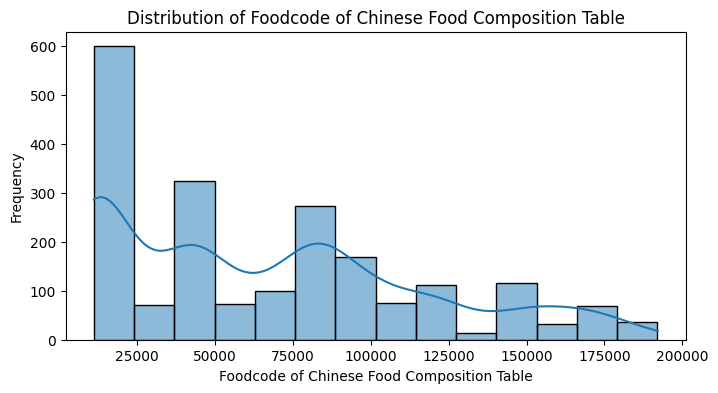

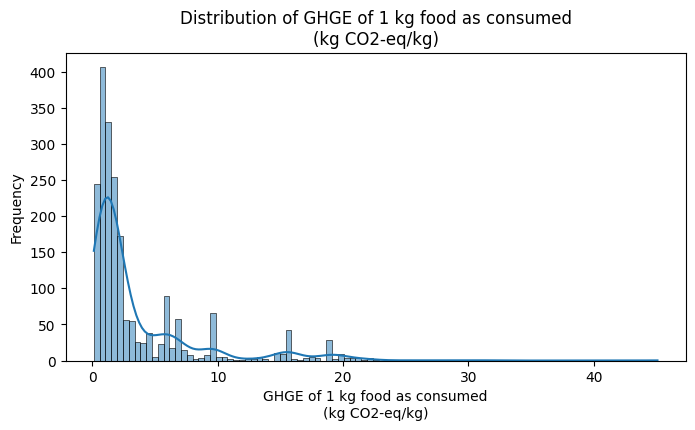

In [2]:
# Display the first few rows
print("Preview of the data:")
print(df.head())

# Display dataset structure
print("\nDataset structure:")
print(df.info())

# Display column names and data types
print("\nColumns and their data types:")
print(df.dtypes)

# Statistical summary of numeric columns
print("\nStatistical summary of numeric columns:")
print(df.describe())

# Count of unique values per column
print("\nNumber of unique values per column:")
for column in df.columns:
    unique_count = df[column].nunique()
    print(f"{column}: {unique_count} unique values")

# Display unique values for each column (for small datasets)
print("\nUnique values per column:")
for column in df.columns:
    unique_values = df[column].unique()
    print(f"{column}: {unique_values}")

# Check for duplicate rows
print("\nNumber of duplicate rows:")
duplicate_count = df.duplicated().sum()
print(f"There are {duplicate_count} duplicate rows in the dataset.")

# Check for missing values
print("\nNumber of missing values per column:")
missing_values = df.isnull().sum()
print(missing_values)

# Visualize distributions of numeric columns
numeric_columns = df.select_dtypes(include=['float64', 'int64']).columns

for column in numeric_columns:
    plt.figure(figsize=(8, 4))
    sns.histplot(df[column], kde=True)
    plt.title(f"Distribution of {column}")
    plt.xlabel(column)
    plt.ylabel('Frequency')
    plt.show()



Aggregated Data (Average GHGE for each Food Group):
              Food Group  Average GHGE
0       Aquatic products      5.432509
1              Beverages      0.748538
2                Cereals      1.403891
3                  Dairy      1.597087
4                   Eggs      3.786768
5             Fast foods      2.304713
6          Fats and oils      2.999492
7                  Fruit      0.638916
8        Fungi and algae      2.096933
9                Legumes      1.151088
10    Liquor and alcohol      1.057009
11                  Meat     13.419728
12        Nuts and seeds      1.423085
13               Poultry      6.837964
14  Sugars and preserves      1.610112
15      Tubers, starches      0.784914
16            Vegetables      1.150107
17         fats and oils      2.999492


C:\Users\lucag\AppData\Local\Temp\ipykernel_13996\2448358065.py:19: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(data=aggregated_data, x='Food Group', y='Average GHGE', palette='viridis')


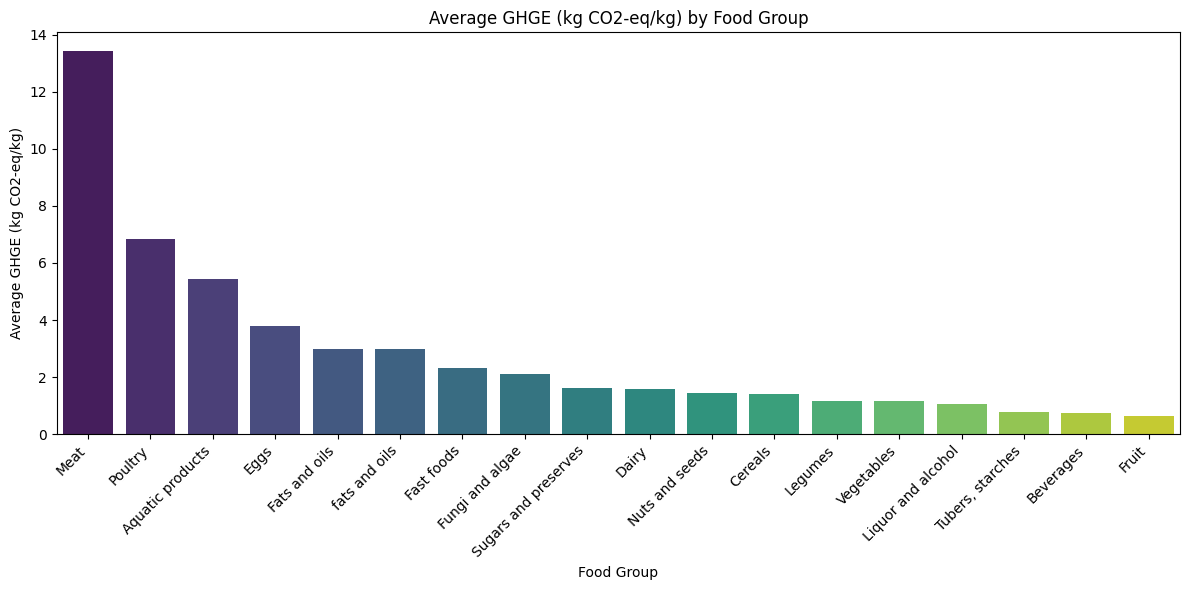

In [3]:
import matplotlib.pyplot as plt
import seaborn as sns

# Group data by 'Food group' (column D) and calculate the average GHGE
aggregated_data = df.groupby('Food group')['GHGE of 1 kg food as consumed\n(kg CO2-eq/kg)'].mean().reset_index()

# Rename columns for clarity
aggregated_data.columns = ['Food Group', 'Average GHGE']

# Display the aggregated data
print("\nAggregated Data (Average GHGE for each Food Group):")
print(aggregated_data)

# Sort values for better visualization
aggregated_data = aggregated_data.sort_values(by='Average GHGE', ascending=False)

# Bar chart to compare average GHGE for each Food Group
plt.figure(figsize=(12, 6))
sns.barplot(data=aggregated_data, x='Food Group', y='Average GHGE', palette='viridis')
plt.title('Average GHGE (kg CO2-eq/kg) by Food Group')
plt.xlabel('Food Group')
plt.ylabel('Average GHGE (kg CO2-eq/kg)')
plt.xticks(rotation=45, ha='right')
plt.tight_layout()
plt.show()




Filtered Number of values per Food Group (sorted by size):
            Food group  Count
2              Cereals    570
12          Vegetables    315
9                 Meat    274
6                Fruit    126
0     Aquatic products    125
5           Fast foods    115
3                Dairy    113
11             Poultry     86
7              Legumes     80
1            Beverages     51
8   Liquor and alcohol     50
4                 Eggs     45
10      Nuts and seeds     42


C:\Users\lucag\AppData\Local\Temp\ipykernel_13996\1630388089.py:22: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(data=group_count_filtered, x='Food group', y='Count', palette='viridis')


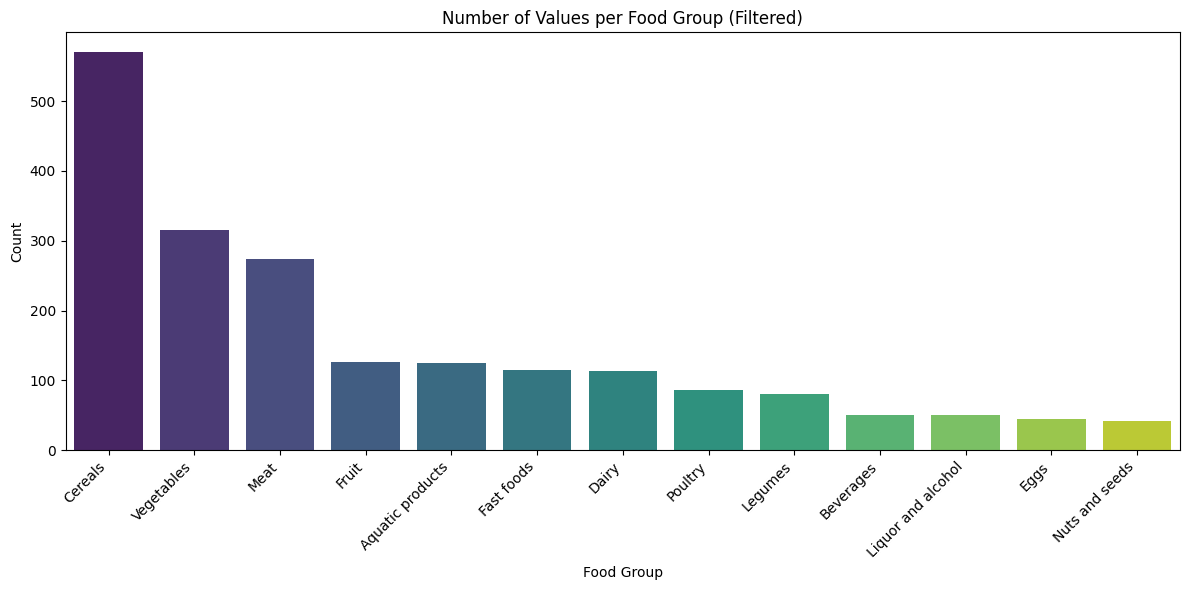

In [4]:
# Group data by 'Food group' and count the number of values in each group
group_count = df.groupby('Food group').size().reset_index(name='Count')

# Rename columns for clarity
group_count.columns = ['Food Group', 'Count']

# Filter out groups with less than 30 values
valid_groups = group_count[group_count['Count'] >= 30]['Food Group']

# Filter the original dataset to include only valid groups
df_filtered = df[df['Food group'].isin(valid_groups)]

# Display the filtered grouped count data
group_count_filtered = df_filtered.groupby('Food group').size().reset_index(name='Count')
group_count_filtered = group_count_filtered.sort_values(by='Count', ascending=False)

print("\nFiltered Number of values per Food Group (sorted by size):")
print(group_count_filtered)

# Bar chart to visualize the count of values for each valid Food Group
plt.figure(figsize=(12, 6))
sns.barplot(data=group_count_filtered, x='Food group', y='Count', palette='viridis')
plt.title('Number of Values per Food Group (Filtered)')
plt.xlabel('Food Group')
plt.ylabel('Count')
plt.xticks(rotation=45, ha='right')
plt.tight_layout()
plt.show()


In [5]:
from scipy.stats import shapiro

# Loop through each group and perform Shapiro-Wilk Test
print("\nShapiro-Wilk Test for Normality (p-value):")
for group in df_filtered['Food group'].unique():
    group_data = df_filtered[df_filtered['Food group'] == group]['GHGE of 1 kg food as consumed\n(kg CO2-eq/kg)']
    
    if len(group_data) > 3:  # Shapiro-Wilk requires at least 4 values
        stat, p_value = shapiro(group_data)
        print(f"Group: {group} | p-value: {p_value:.4f}")
        
        if p_value > 0.05:
            print(f"-> {group} likely follows a normal distribution.")
        else:
            print(f"-> {group} does not follow a normal distribution.")
    else:
        print(f"Group: {group} has too few values for a reliable Shapiro-Wilk test.")



Shapiro-Wilk Test for Normality (p-value):
Group: Cereals | p-value: 0.0000
-> Cereals does not follow a normal distribution.
Group: Legumes | p-value: 0.0000
-> Legumes does not follow a normal distribution.
Group: Vegetables | p-value: 0.0000
-> Vegetables does not follow a normal distribution.
Group: Fruit | p-value: 0.0000
-> Fruit does not follow a normal distribution.
Group: Nuts and seeds | p-value: 0.0000
-> Nuts and seeds does not follow a normal distribution.
Group: Meat | p-value: 0.0000
-> Meat does not follow a normal distribution.
Group: Poultry | p-value: 0.0000
-> Poultry does not follow a normal distribution.
Group: Dairy | p-value: 0.0016
-> Dairy does not follow a normal distribution.
Group: Eggs | p-value: 0.1201
-> Eggs likely follows a normal distribution.
Group: Aquatic products | p-value: 0.0000
-> Aquatic products does not follow a normal distribution.
Group: Fast foods | p-value: 0.0000
-> Fast foods does not follow a normal distribution.
Group: Beverages | p

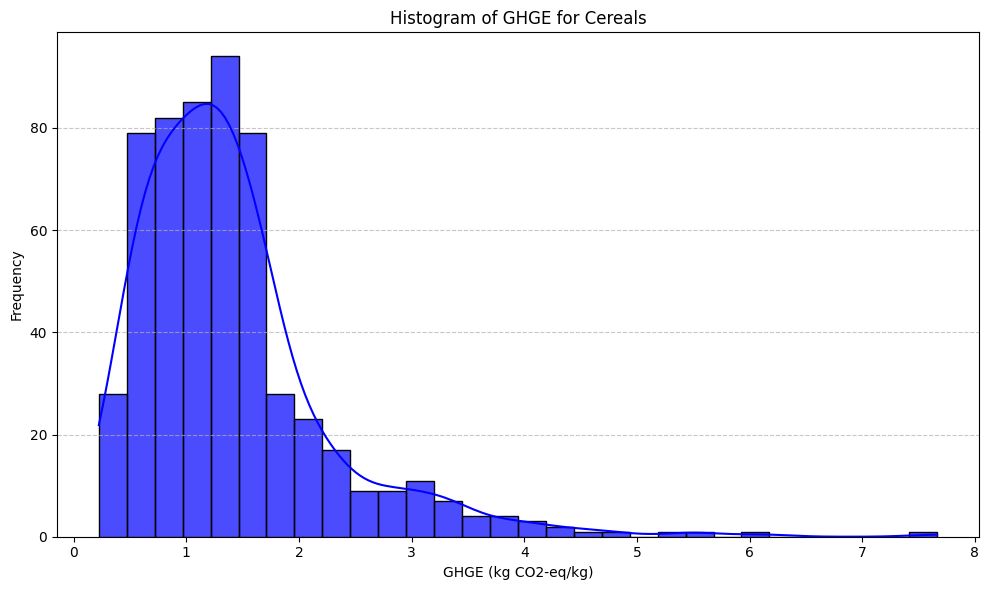

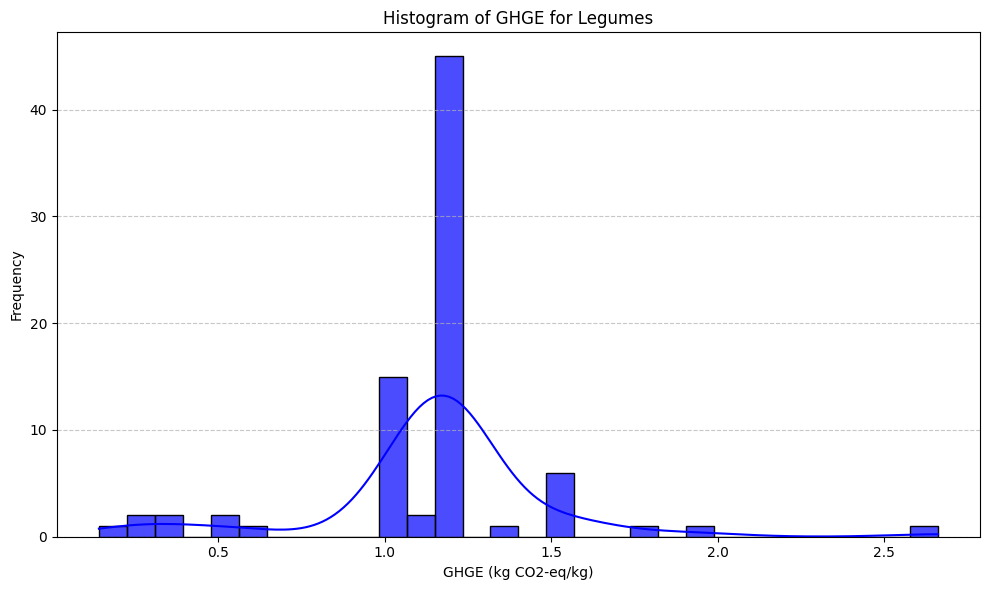

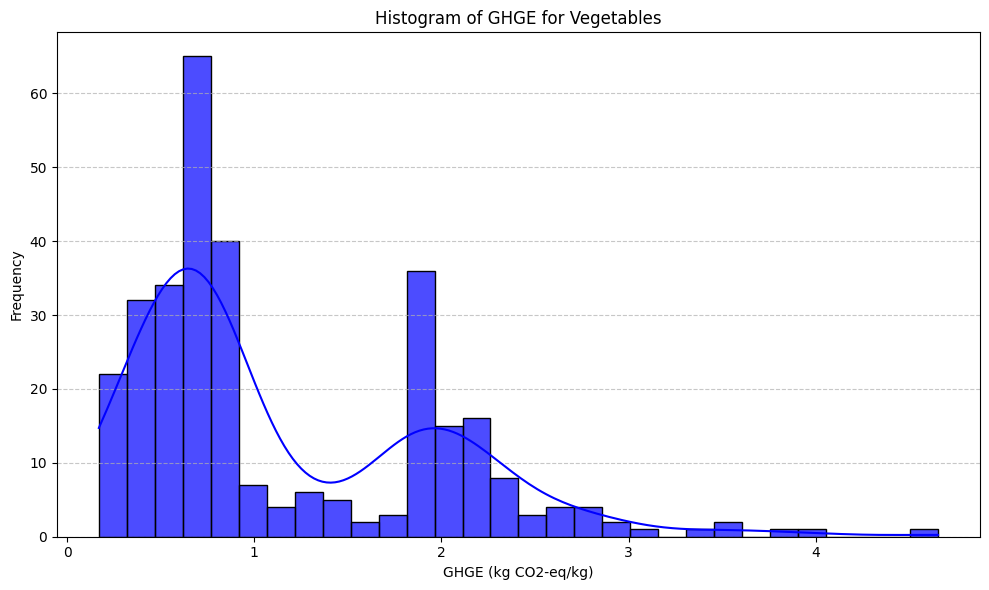

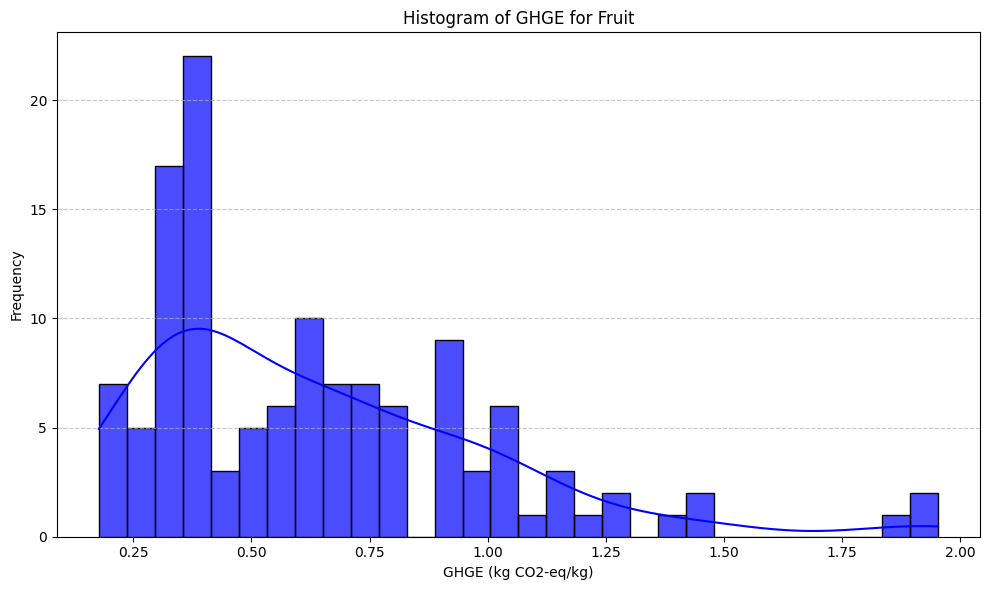

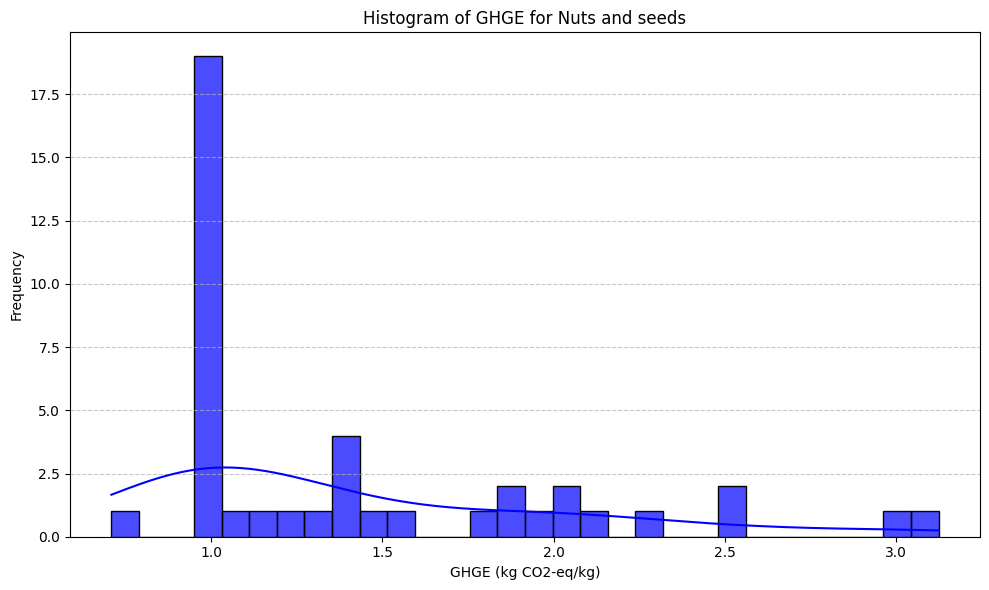

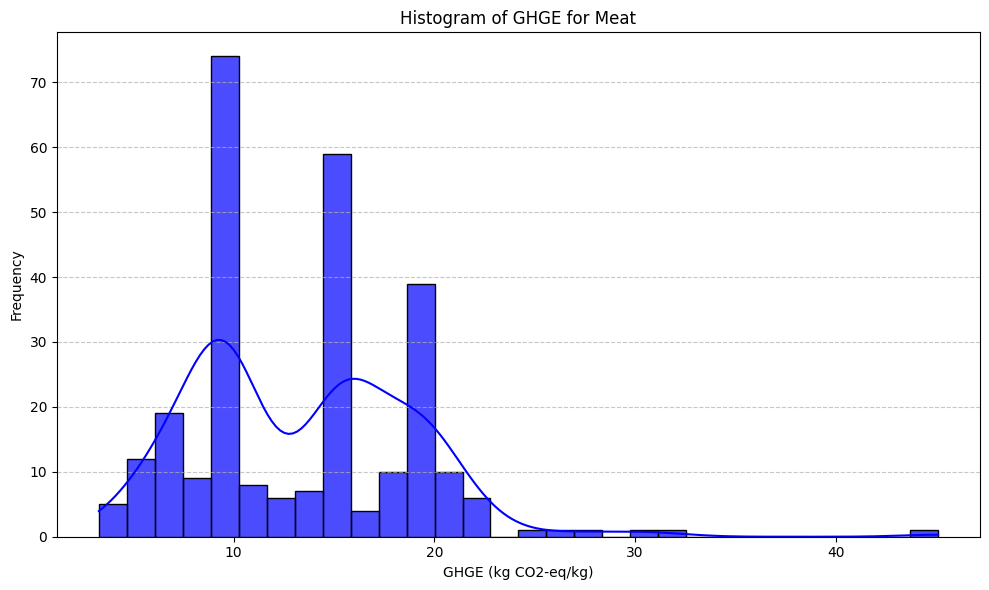

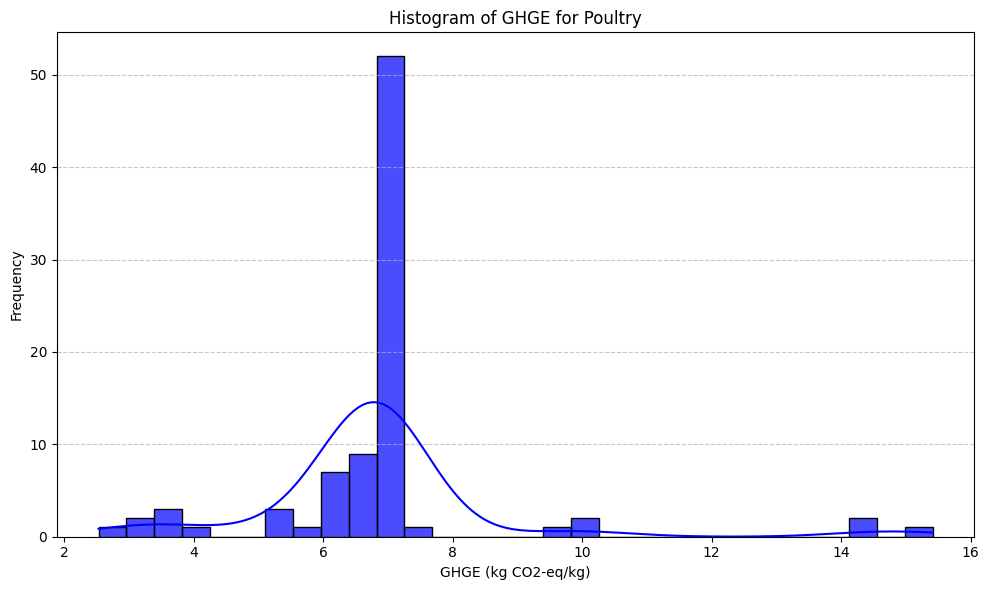

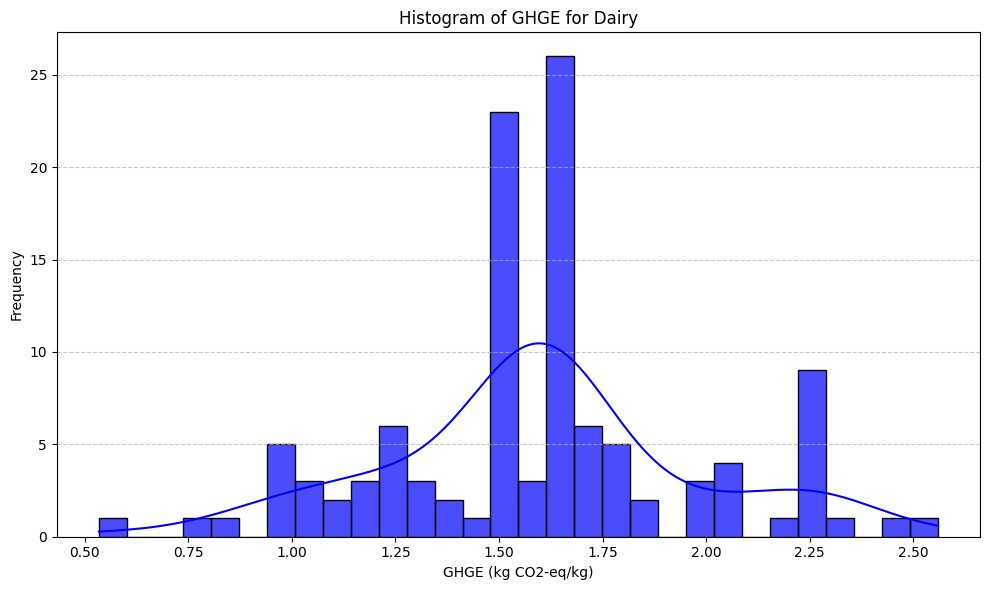

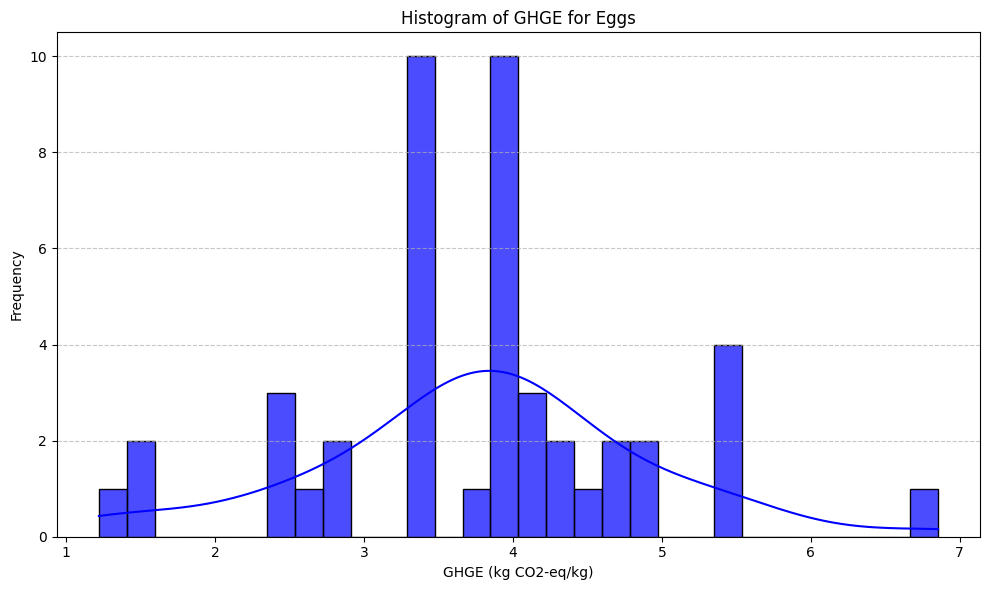

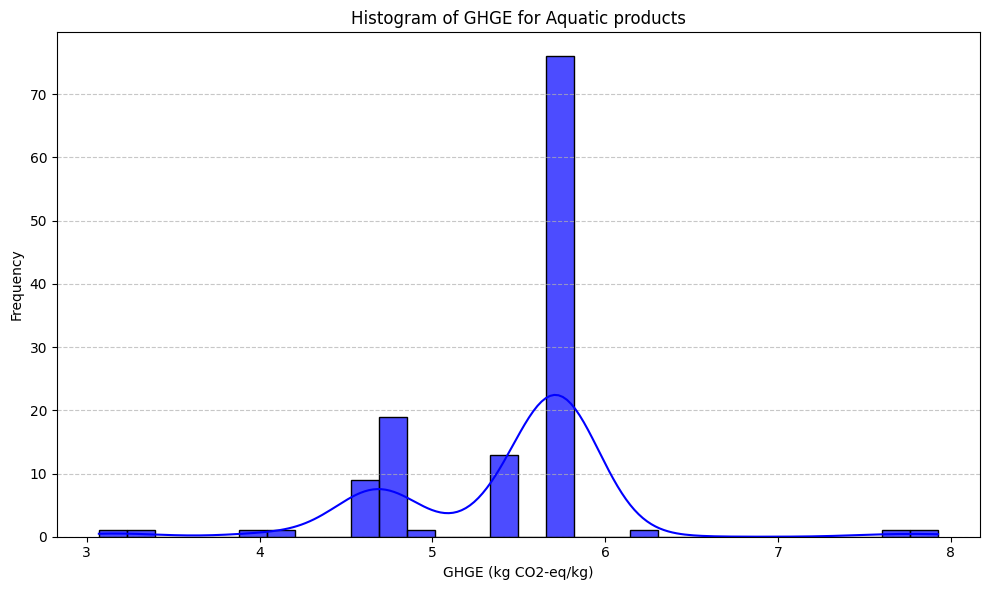

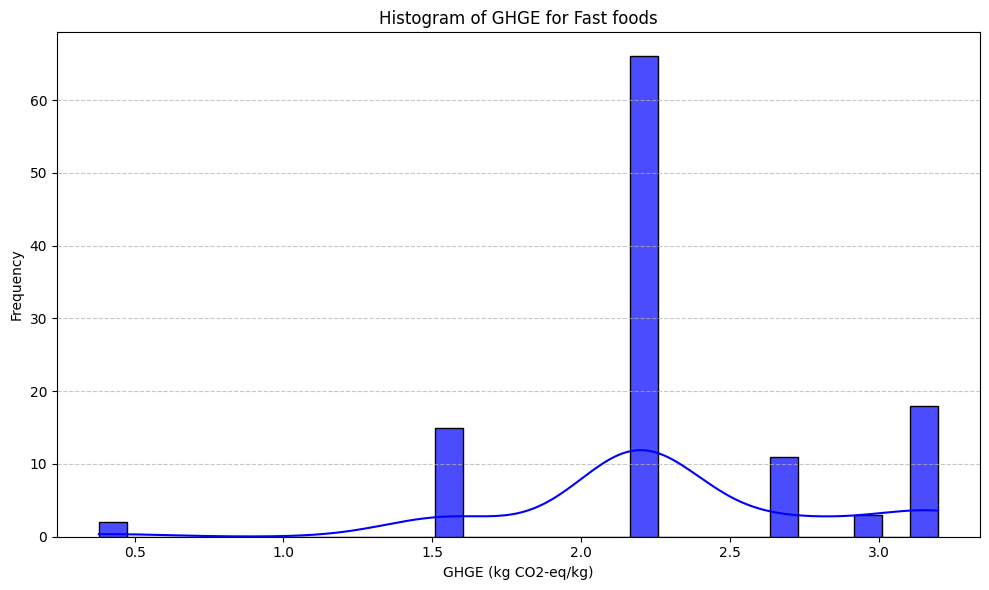

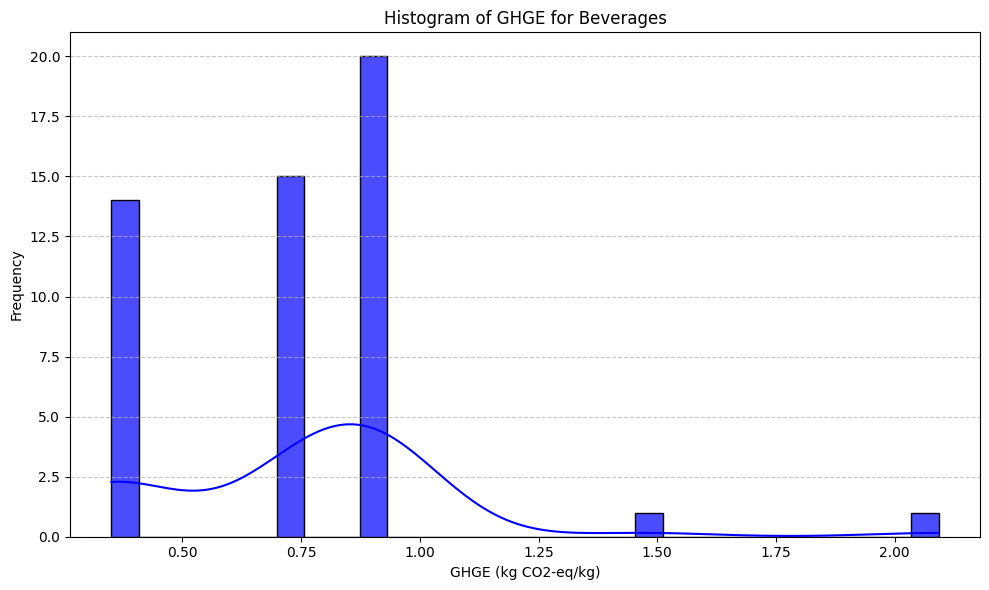

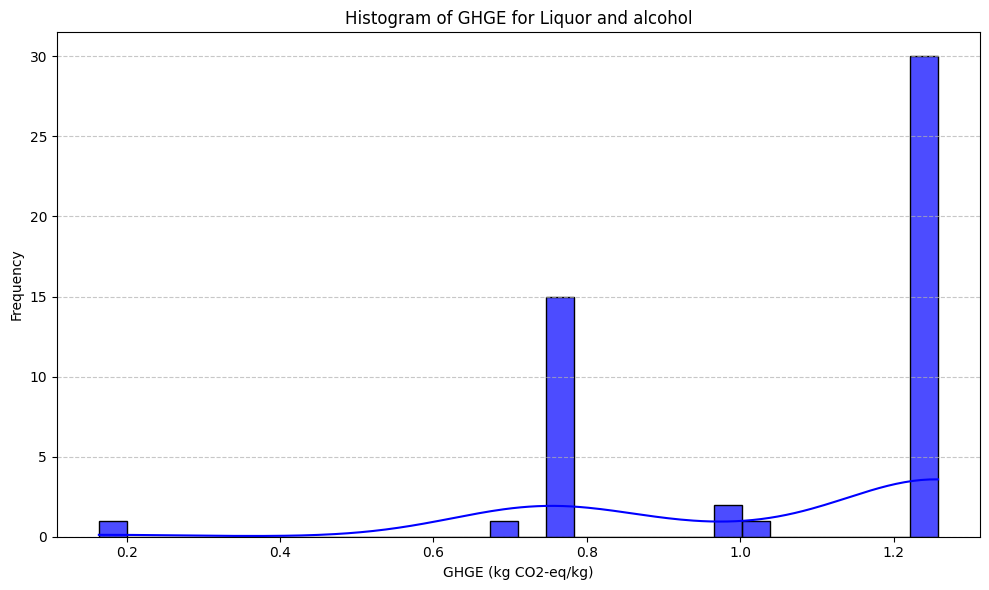

In [6]:

# Loop through each group and create a histogram
for group in df_filtered['Food group'].unique():
    group_data = df_filtered[df_filtered['Food group'] == group]['GHGE of 1 kg food as consumed\n(kg CO2-eq/kg)']
    
    plt.figure(figsize=(10, 6))
    sns.histplot(group_data, kde=True, bins=30, color='blue', alpha=0.7)
    plt.title(f'Histogram of GHGE for {group}')
    plt.xlabel('GHGE (kg CO2-eq/kg)')
    plt.ylabel('Frequency')
    plt.grid(axis='y', linestyle='--', alpha=0.7)
    plt.tight_layout()
    plt.show()



Variances of GHGE for each Food Group:
Food group
Aquatic products       0.393341
Beverages              0.102709
Cereals                0.769468
Dairy                  0.142063
Eggs                   1.204469
Fast foods             0.296898
Fruit                  0.133091
Legumes                0.121258
Liquor and alcohol     0.072624
Meat                  30.610452
Nuts and seeds         0.378752
Poultry                3.744307
Vegetables             0.652407
Name: GHGE of 1 kg food as consumed\n(kg CO2-eq/kg), dtype: float64


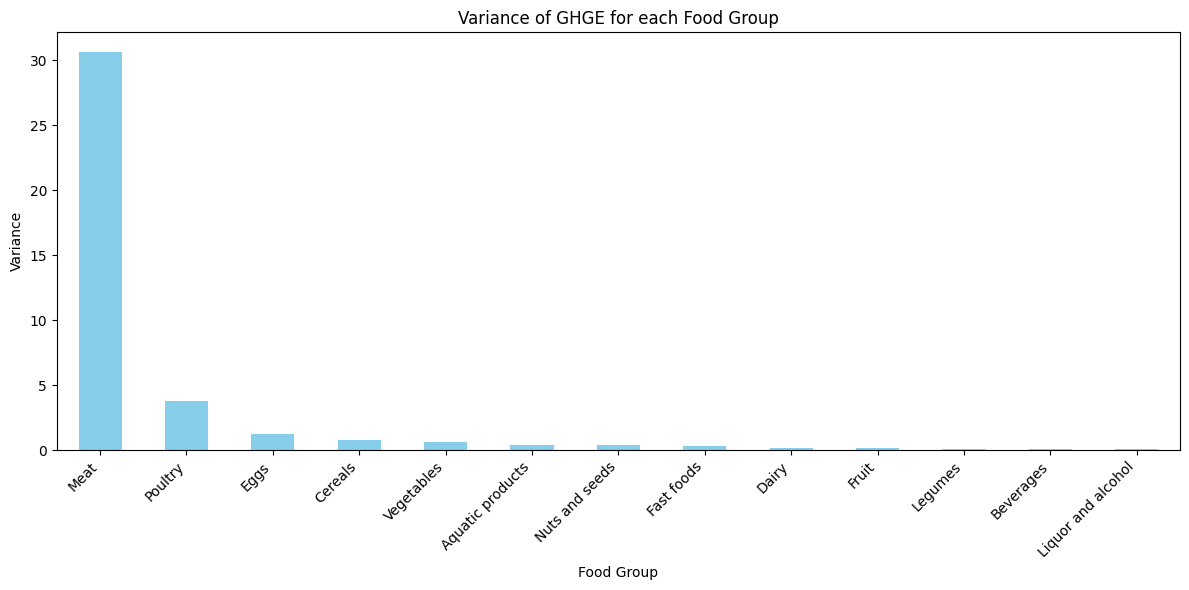


Levene's Test:
Statistic: 203.6954, p-value: 0.0000
-> Variances are likely not equal (p <= 0.05).

Bartlett's Test:
Statistic: 3495.9485, p-value: 0.0000
-> Variances are likely not equal (p <= 0.05).


In [7]:
from scipy.stats import levene, bartlett

# Calculate variance for each group
variances = df_filtered.groupby('Food group')['GHGE of 1 kg food as consumed\n(kg CO2-eq/kg)'].var()

# Display variances
print("\nVariances of GHGE for each Food Group:")
print(variances)

# Visualize variances
plt.figure(figsize=(12, 6))
variances.sort_values(ascending=False).plot(kind='bar', color='skyblue')
plt.title('Variance of GHGE for each Food Group')
plt.xlabel('Food Group')
plt.ylabel('Variance')
plt.xticks(rotation=45, ha='right')
plt.tight_layout()
plt.show()

# Prepare data for variance homogeneity test
group_data = [df_filtered[df_filtered['Food group'] == group]['GHGE of 1 kg food as consumed\n(kg CO2-eq/kg)'].dropna() 
              for group in df_filtered['Food group'].unique()]

# Perform Levene's Test for equality of variances
levene_stat, levene_p = levene(*group_data)
print("\nLevene's Test:")
print(f"Statistic: {levene_stat:.4f}, p-value: {levene_p:.4f}")
if levene_p > 0.05:
    print("-> Variances are likely equal (p > 0.05).")
else:
    print("-> Variances are likely not equal (p <= 0.05).")

# Perform Bartlett's Test for equality of variances
bartlett_stat, bartlett_p = bartlett(*group_data)
print("\nBartlett's Test:")
print(f"Statistic: {bartlett_stat:.4f}, p-value: {bartlett_p:.4f}")
if bartlett_p > 0.05:
    print("-> Variances are likely equal (p > 0.05).")
else:
    print("-> Variances are likely not equal (p <= 0.05).")



Updated Food Groups (after dropping 'Meat' and 'Poultry'):
['Cereals' 'Legumes' 'Vegetables' 'Fruit' 'Nuts and seeds' 'Dairy' 'Eggs'
 'Aquatic products' 'Fast foods' 'Beverages' 'Liquor and alcohol']

Variances of GHGE for each Food Group (after dropping 'Meat' and 'Poultry'):
Food group
Aquatic products      0.393341
Beverages             0.102709
Cereals               0.769468
Dairy                 0.142063
Eggs                  1.204469
Fast foods            0.296898
Fruit                 0.133091
Legumes               0.121258
Liquor and alcohol    0.072624
Nuts and seeds        0.378752
Vegetables            0.652407
Name: GHGE of 1 kg food as consumed\n(kg CO2-eq/kg), dtype: float64


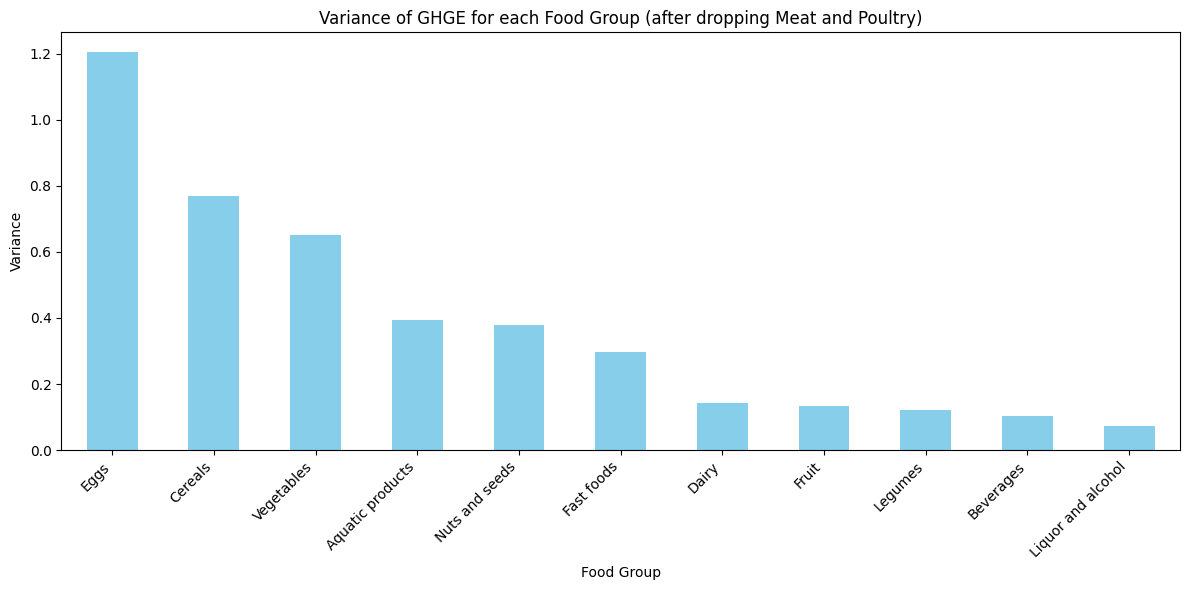


Levene's Test (after dropping 'Meat' and 'Poultry'):
Statistic: 13.6382, p-value: 0.0000
-> Variances are likely not equal (p <= 0.05).

Bartlett's Test (after dropping 'Meat' and 'Poultry'):
Statistic: 390.1128, p-value: 0.0000
-> Variances are likely not equal (p <= 0.05).


In [8]:
# Drop the groups 'Meat' and 'Poultry' from the filtered dataset
df_filtered = df_filtered[~df_filtered['Food group'].isin(['Meat', 'Poultry'])]

# Verify that 'Meat' and 'Poultry' have been removed
print("\nUpdated Food Groups (after dropping 'Meat' and 'Poultry'):")
print(df_filtered['Food group'].unique())

# Recalculate variances without 'Meat' and 'Poultry'
variances = df_filtered.groupby('Food group')['GHGE of 1 kg food as consumed\n(kg CO2-eq/kg)'].var()

# Display updated variances
print("\nVariances of GHGE for each Food Group (after dropping 'Meat' and 'Poultry'):")
print(variances)

# Visualize updated variances
plt.figure(figsize=(12, 6))
variances.sort_values(ascending=False).plot(kind='bar', color='skyblue')
plt.title('Variance of GHGE for each Food Group (after dropping Meat and Poultry)')
plt.xlabel('Food Group')
plt.ylabel('Variance')
plt.xticks(rotation=45, ha='right')
plt.tight_layout()
plt.show()

# Prepare data for variance homogeneity test (without 'Meat' and 'Poultry')
group_data = [df_filtered[df_filtered['Food group'] == group]['GHGE of 1 kg food as consumed\n(kg CO2-eq/kg)'].dropna() 
              for group in df_filtered['Food group'].unique()]

# Perform Levene's Test for equality of variances
levene_stat, levene_p = levene(*group_data)
print("\nLevene's Test (after dropping 'Meat' and 'Poultry'):")
print(f"Statistic: {levene_stat:.4f}, p-value: {levene_p:.4f}")
if levene_p > 0.05:
    print("-> Variances are likely equal (p > 0.05).")
else:
    print("-> Variances are likely not equal (p <= 0.05).")

# Perform Bartlett's Test for equality of variances
bartlett_stat, bartlett_p = bartlett(*group_data)
print("\nBartlett's Test (after dropping 'Meat' and 'Poultry'):")
print(f"Statistic: {bartlett_stat:.4f}, p-value: {bartlett_p:.4f}")
if bartlett_p > 0.05:
    print("-> Variances are likely equal (p > 0.05).")
else:
    print("-> Variances are likely not equal (p <= 0.05).")



ANOVA Test Results:
F-statistic: 453.2795, p-value: 0.0000
-> Significant difference between groups (p <= 0.05).


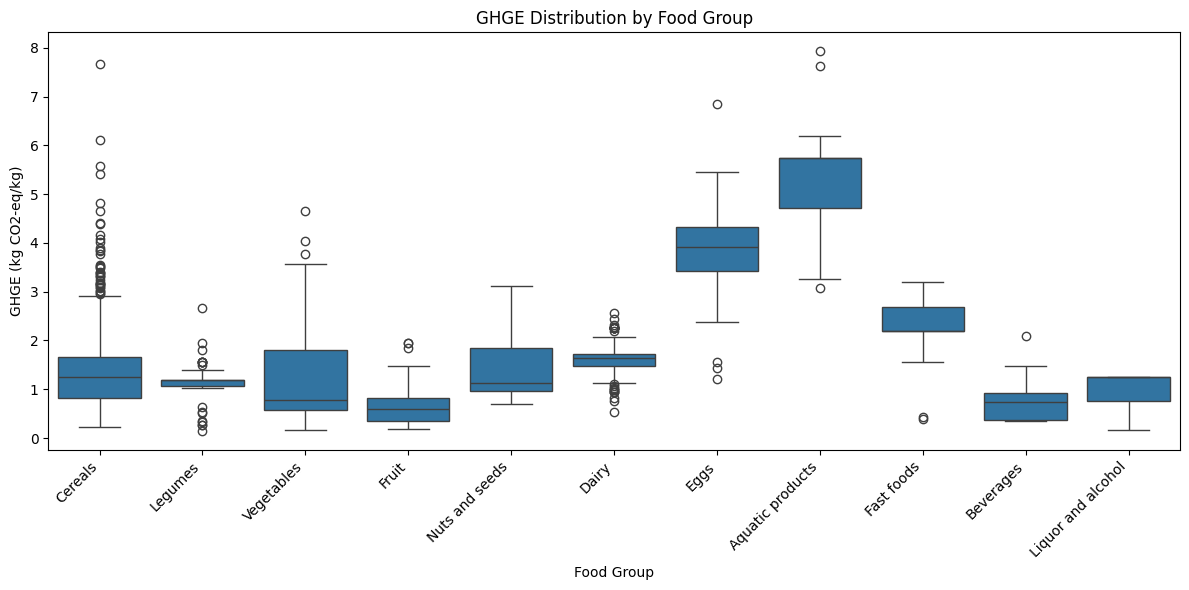

In [9]:
from scipy.stats import f_oneway
import matplotlib.pyplot as plt
import seaborn as sns

# Prepare data for ANOVA
group_data = [df_filtered[df_filtered['Food group'] == group]['GHGE of 1 kg food as consumed\n(kg CO2-eq/kg)'].dropna() 
              for group in df_filtered['Food group'].unique()]

# Perform ANOVA test
anova_stat, anova_p = f_oneway(*group_data)
print("\nANOVA Test Results:")
print(f"F-statistic: {anova_stat:.4f}, p-value: {anova_p:.4f}")
if anova_p > 0.05:
    print("-> No significant difference between groups (p > 0.05).")
else:
    print("-> Significant difference between groups (p <= 0.05).")

# Visualize the data with a boxplot to show group differences
plt.figure(figsize=(12, 6))
sns.boxplot(data=df_filtered, x='Food group', y='GHGE of 1 kg food as consumed\n(kg CO2-eq/kg)')
plt.title('GHGE Distribution by Food Group')
plt.xlabel('Food Group')
plt.ylabel('GHGE (kg CO2-eq/kg)')
plt.xticks(rotation=45, ha='right')
plt.tight_layout()
plt.show()




Tukey HSD Test Results:
                group1              group2  meandiff   p-adj   lower   upper  \
0     Aquatic products           Beverages   -4.6840  0.0000 -5.0706 -4.2974   
1     Aquatic products             Cereals   -4.0286  0.0000 -4.2584 -3.7988   
2     Aquatic products               Dairy   -3.8354  0.0000 -4.1374 -3.5334   
3     Aquatic products                Eggs   -1.6457  0.0000 -2.0502 -1.2412   
4     Aquatic products          Fast foods   -3.1278  0.0000 -3.4284 -2.8272   
5     Aquatic products               Fruit   -4.7936  0.0000 -5.0873 -4.4999   
6     Aquatic products             Legumes   -4.2814  0.0000 -4.6146 -3.9483   
7     Aquatic products  Liquor and alcohol   -4.3755  0.0000 -4.7648 -3.9862   
8     Aquatic products      Nuts and seeds   -4.0094  0.0000 -4.4244 -3.5944   
9     Aquatic products          Vegetables   -4.2824  0.0000 -4.5284 -4.0364   
10           Beverages             Cereals    0.6554  0.0000  0.3153  0.9954   
11           Be

<Figure size 1000x600 with 0 Axes>

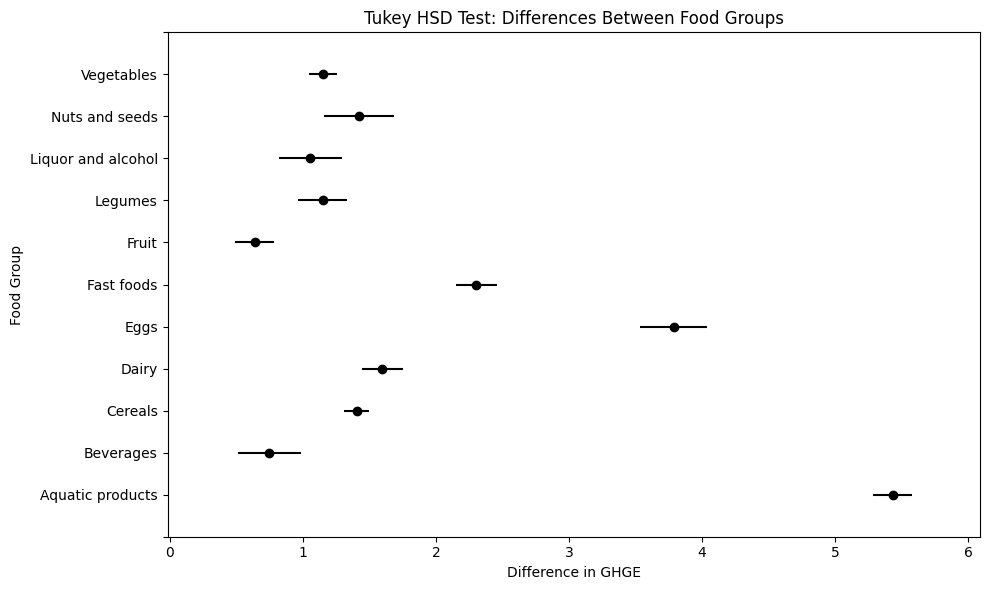

In [10]:
from statsmodels.stats.multicomp import pairwise_tukeyhsd

# Perform Tukey HSD Test
tukey_results = pairwise_tukeyhsd(
    endog=df_filtered['GHGE of 1 kg food as consumed\n(kg CO2-eq/kg)'],  # Dependent variable
    groups=df_filtered['Food group'],  # Groups
    alpha=0.05  # Significance level
)

# Display Tukey HSD results as a table
tukey_table = pd.DataFrame(data=tukey_results.summary().data[1:], columns=tukey_results.summary().data[0])
print("\nTukey HSD Test Results:")
print(tukey_table)

# Save the table as a CSV file (optional)
tukey_table.to_csv("tukey_hsd_results.csv", index=False)

# Visualize the results
plt.figure(figsize=(10, 6))
tukey_results.plot_simultaneous(comparison_name=None, xlabel="Difference in GHGE", ylabel="Food Group")
plt.title('Tukey HSD Test: Differences Between Food Groups')
plt.tight_layout()
plt.show()


Now lets compare water use 

In [11]:
import pandas as pd

# Pfad zur Excel-Datei
file_path = 'chinese_food.xlsx'

# Liste aller Arbeitsblätter ausgeben
all_sheets = pd.ExcelFile(file_path)
print(f"Available sheets: {all_sheets.sheet_names}")

# Zweites Arbeitsblatt einlesen
second_sheet_name = all_sheets.sheet_names[1]  # Index 1 = zweites Arbeitsblatt
second_sheet_df = pd.read_excel(file_path, sheet_name=second_sheet_name)

# Den DataFrame des zweiten Arbeitsblatts anzeigen
print(f"\nData from the second sheet ({second_sheet_name}):")
display(second_sheet_df.head())


Available sheets: ['Greenhouse Gas Emission', 'Water Use', 'Land Use']

Data from the second sheet (Water Use):


,Foodcode of Chinese Food Composition Table,Food item,Food sub-group,Food group,WU of 1 kg food as consumed \n(m³/kg),Data source,Language of journal
0,11101,wheat,wheat,Cereals,0.046200,"Zhang Y, Huang K, Ridoutt B G, et al. Comparin...",English
1,11101,wheat,wheat,Cereals,0.133980,"Zhang Y, Huang K, Ridoutt B G, et al. Comparin...",English
2,11101,wheat,wheat,Cereals,0.151305,"Zhang Y, Huang K, Ridoutt B G, et al. Comparin...",English
3,11101,wheat,wheat,Cereals,0.181335,灌区粮食生产水足迹的影响因素研究 \nStudy on factors affecting ...,Chinese
4,11101,wheat,wheat,Cereals,0.202125,灌区粮食生产水足迹的影响因素研究 \nStudy on factors affecting ...,Chinese


In [12]:
# Pfad zur Excel-Datei
file_path = 'chinese_food.xlsx'

# Zweites Arbeitsblatt einlesen
all_sheets = pd.ExcelFile(file_path)
second_sheet_name = all_sheets.sheet_names[1]  # Index 1 = zweites Arbeitsblatt
second_sheet_df = pd.read_excel(file_path, sheet_name=second_sheet_name)

# Vorschau der Daten anzeigen
print(f"\nData from the second sheet ({second_sheet_name}):")
display(second_sheet_df.head())

# Prüfen, ob die Spalten 'Food group' und Zielvariable existieren
if 'Food group' not in second_sheet_df.columns:
    raise KeyError("The column 'Food group' is missing in the dataset.")
if 'WU of 1 kg food as consumed (m³/kg)' not in second_sheet_df.columns:
    raise KeyError("The target column for ANOVA (Water Use) is missing in the dataset.")

# Daten auf Gruppenbasis vorbereiten
group_data = [
    second_sheet_df[second_sheet_df['Food group'] == group]['WU of 1 kg food as consumed (m³/kg)'].dropna()
    for group in second_sheet_df['Food group'].unique()
]

# ANOVA-Test durchführen
anova_stat, anova_p = f_oneway(*group_data)
print("\nANOVA Test Results (Water Use):")
print(f"F-statistic: {anova_stat:.4f}, p-value: {anova_p:.4f}")
if anova_p > 0.05:
    print("-> No significant difference between groups (p > 0.05).")
else:
    print("-> Significant difference between groups (p <= 0.05).")

# Visualisierung der Verteilung pro Gruppe (Boxplot)
plt.figure(figsize=(12, 6))
sns.boxplot(data=second_sheet_df, x='Food group', y='WU of 1 kg food as consumed (m³/kg)', palette='viridis')
plt.title('Water Use (WU) Distribution by Food Group (Second Sheet)')
plt.xlabel('Food Group')
plt.ylabel('WU (m³/kg)')
plt.xticks(rotation=45, ha='right')
plt.tight_layout()
plt.show()

# Visualisierung der Mittelwerte (Barplot)
group_means = second_sheet_df.groupby('Food group')['WU of 1 kg food as consumed (m³/kg)'].mean().reset_index()
group_means.columns = ['Food Group', 'Mean WU']

plt.figure(figsize=(12, 6))
sns.barplot(data=group_means, x='Food Group', y='Mean WU', palette='viridis')
plt.title('Mean Water Use (WU) by Food Group (Second Sheet)')
plt.xlabel('Food Group')
plt.ylabel('Mean WU (m³/kg)')
plt.xticks(rotation=45, ha='right')
plt.tight_layout()
plt.show()



Data from the second sheet (Water Use):


,Foodcode of Chinese Food Composition Table,Food item,Food sub-group,Food group,WU of 1 kg food as consumed \n(m³/kg),Data source,Language of journal
0,11101,wheat,wheat,Cereals,0.046200,"Zhang Y, Huang K, Ridoutt B G, et al. Comparin...",English
1,11101,wheat,wheat,Cereals,0.133980,"Zhang Y, Huang K, Ridoutt B G, et al. Comparin...",English
2,11101,wheat,wheat,Cereals,0.151305,"Zhang Y, Huang K, Ridoutt B G, et al. Comparin...",English
3,11101,wheat,wheat,Cereals,0.181335,灌区粮食生产水足迹的影响因素研究 \nStudy on factors affecting ...,Chinese
4,11101,wheat,wheat,Cereals,0.202125,灌区粮食生产水足迹的影响因素研究 \nStudy on factors affecting ...,Chinese


KeyError: 'The target column for ANOVA (Water Use) is missing in the dataset.'

Notes: Type 3 Anova kann mit Daten umgehen, die ungleich sind. 
- Tukey Test ist eine gute Idee nach der ANOVA. 
- Man muss einfach den gleichen Prozess für alle drei Daten machen und wahrscheinlich ist einfacher die Arbeitsblätter einzlen einzulesen

Wichtig: Assumptions, Anova durchführen. zur Hausaufabe: interactions und gruppen : Also müssen 2 Kategorien kombiniert sein. 

In [ ]:
# Prepare data for ANOVA
group_data_wu = [
    second_sheet_df[second_sheet_df['Food group'] == group]['WU of 1 kg food as consumed\n(m³/kg)'].dropna()
    for group in second_sheet_df['Food group'].unique()
]

# Perform ANOVA test
anova_stat_wu, anova_p_wu = f_oneway(*group_data_wu)
print("\nANOVA Test Results (Water Use):")
print(f"F-statistic: {anova_stat_wu:.4f}, p-value: {anova_p_wu:.4f}")
if anova_p_wu > 0.05:
    print("-> No significant difference between groups (p > 0.05).")
else:
    print("-> Significant difference between groups (p <= 0.05).")

# Visualize the data with a boxplot to show group differences
plt.figure(figsize=(12, 6))
sns.boxplot(data=second_sheet_df, x='Food group', y='WU of 1 kg food as consumed\n(m³/kg)', palette='viridis')
plt.title('Water Use (WU) Distribution by Food Group')
plt.xlabel('Food Group')
plt.ylabel('WU (m³/kg)')
plt.xticks(rotation=45, ha='right')
plt.tight_layout()
plt.show()